<a href="https://colab.research.google.com/github/rev-an/rev-an/blob/main/music_genre_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import LeakyReLU, ReLU
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import pylab
from matplotlib import figure
import gc
from pathlib import Path


In [ ]:
!tar -xvzf genres.tar.gz -C /content/

genres/
genres/blues/
genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.a

In [ ]:
import os

# Path to the dataset and output folder
dataset_path = '/content/genres'
output_path = '/content/genres_wav'

# Create output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Loop through each genre folder
for genre in os.listdir(dataset_path):
    genre_path = os.path.join(dataset_path, genre)

    # Skip if it's not a directory
    if os.path.isdir(genre_path):
        for filename in os.listdir(genre_path):
            if filename.endswith('.au'):
                input_file = os.path.join(genre_path, filename)
                output_file = os.path.join(output_path, f'{genre}_{filename.replace(".au", ".wav")}')

                # Run ffmpeg command
                os.system(f'ffmpeg -i "{input_file}" "{output_file}"')
                print(f'Converted {input_file} to {output_file}')


Converted /content/genres/country/country.00011.au to /content/genres_wav/country_country.00011.wav
Converted /content/genres/country/country.00005.au to /content/genres_wav/country_country.00005.wav
Converted /content/genres/country/country.00008.au to /content/genres_wav/country_country.00008.wav
Converted /content/genres/country/country.00003.au to /content/genres_wav/country_country.00003.wav
Converted /content/genres/country/country.00012.au to /content/genres_wav/country_country.00012.wav
Converted /content/genres/country/country.00004.au to /content/genres_wav/country_country.00004.wav
Converted /content/genres/country/country.00001.au to /content/genres_wav/country_country.00001.wav
Converted /content/genres/country/country.00002.au to /content/genres_wav/country_country.00002.wav
Converted /content/genres/country/country.00000.au to /content/genres_wav/country_country.00000.wav
Converted /content/genres/country/country.00009.au to /content/genres_wav/country_country.00009.wav


In [ ]:
import shutil

# Path where your .wav files are located
input_path = '/content/genres_wav'  # Adjust this based on where your .wav files are
output_path = '/content/org_genres_wav'  # The directory to store the files back in subdirectories

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Loop through each .wav file in the input directory
for filename in os.listdir(input_path):
    if filename.lower().endswith('.wav'):  # Check for .wav files (case-insensitive)

        # Assuming that the genre is part of the filename (e.g., 'blues_song1.wav')
        genre = filename.split('_')[0]  # Modify this line based on your naming convention

        # Create the genre folder inside output_path if it doesn't exist
        genre_folder = os.path.join(output_path, genre)
        os.makedirs(genre_folder, exist_ok=True)

        # Define source (current location of the file) and destination (where to move the file)
        source = os.path.join(input_path, filename)
        destination = os.path.join(genre_folder, filename)

        # Move the file
        shutil.move(source, destination)

        print(f'Moved {filename} to {genre_folder}')


Moved classical_classical.00052.wav to /content/org_genres_wav/classical
Moved classical_classical.00053.wav to /content/org_genres_wav/classical
Moved blues_blues.00007.wav to /content/org_genres_wav/blues
Moved blues_blues.00052.wav to /content/org_genres_wav/blues
Moved classical_classical.00097.wav to /content/org_genres_wav/classical
Moved blues_blues.00076.wav to /content/org_genres_wav/blues
Moved blues_blues.00081.wav to /content/org_genres_wav/blues
Moved blues_blues.00041.wav to /content/org_genres_wav/blues
Moved classical_classical.00030.wav to /content/org_genres_wav/classical
Moved classical_classical.00089.wav to /content/org_genres_wav/classical
Moved classical_classical.00024.wav to /content/org_genres_wav/classical
Moved blues_blues.00043.wav to /content/org_genres_wav/blues
Moved country_country.00003.wav to /content/org_genres_wav/country
Moved blues_blues.00025.wav to /content/org_genres_wav/blues
Moved classical_classical.00091.wav to /content/org_genres_wav/class

In [ ]:
!pip install memory_profiler

In [ ]:
from memory_profiler import memory_usage
from glob import glob # Pattern matching

In [ ]:
%%capture
# This is a Jupyter notebook cell magic that captures the output (stdout and stderr) of everything in the cell.
# It prevents any output (like text, warnings, or errors) from being displayed in the notebook.

!apt-get install libav-tools -y ## audio in jupyter
# This is a shell command that installs the `libav-tools` package using `apt-get` (a package manager on Linux).
# 'libav-tools' is a set of tools for handling multimedia data (like audio and video).
# '-y' automatically answers "yes" to prompts during the installation process.


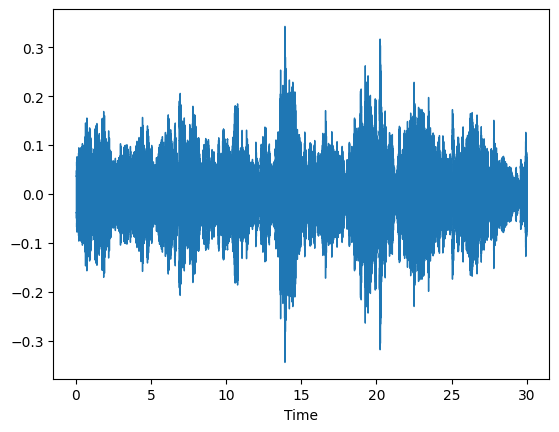

[-0.02008057 -0.01748657  0.00418091 ...  0.01934814  0.027771
  0.03131104]


661794

In [12]:
# Load the audio file
filename = '/content/org_genres_wav/classical/classical_classical.00000.wav'
y, sr = librosa.load(filename)

# Trim silent edges
sample_sound, _ = librosa.effects.trim(y)

# Plot the waveform
librosa.display.waveshow(sample_sound, sr=sr)

# Display the plot
plt.show()

print(sample_sound)
len(sample_sound)

In [13]:
print (len(y)/sr)

30.013333333333332


In [14]:
from IPython.display import Audio
Audio(filename , rate=sr)

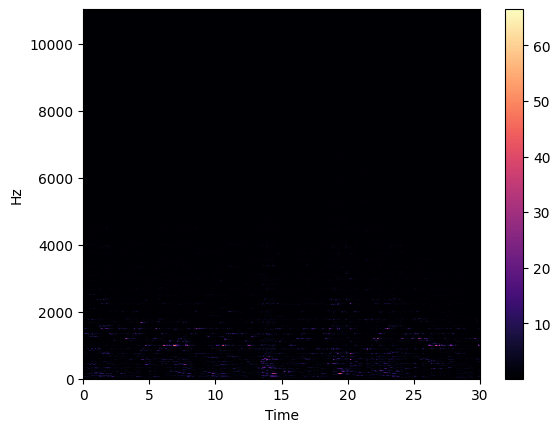

In [15]:

hop_length = 512  # Defines the hop length, which is the number of samples between consecutive frames in the STFT. Smaller values increase time resolution.

n_fft = 2048  # Sets the number of data points used in each block for the Fast Fourier Transform (FFT). This controls the window size. A higher number increases frequency resolution.

D = np.abs(librosa.stft(sample_sound, n_fft=n_fft, hop_length=hop_length))
# Computes the Short-Time Fourier Transform (STFT) of the audio signal 'sample_sound'.
# The STFT is used to convert the time-domain signal into the frequency domain.
# np.abs() is applied to keep only the magnitudes (amplitude) of the complex STFT values.

librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
# Displays a spectrogram of the magnitude of the STFT result 'D'.
# 'sr' sets the sample rate of the audio.
# 'x_axis='time'' labels the x-axis as time.
# 'y_axis='linear'' keeps the y-axis scale linear, showing frequency on a linear scale.

plt.colorbar()  # Adds a color bar to the plot, showing the scale of the amplitude values (loudness) represented by the spectrogram.

plt.show()  # Displays the plot, rendering the spectrogram.


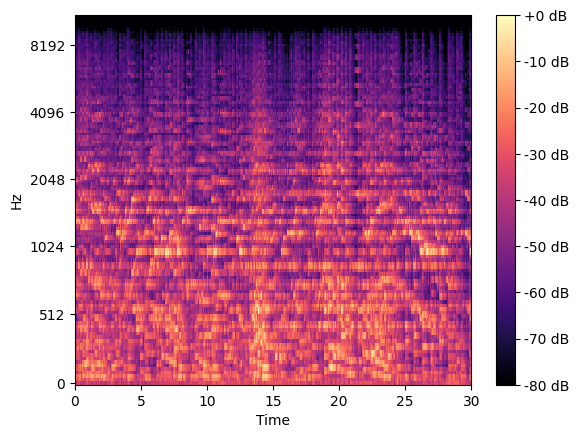

In [16]:
S = librosa.feature.melspectrogram(y=sample_sound, sr=sr, n_fft=n_fft, hop_length=hop_length)
# Computes the Mel-spectrogram of the audio signal 'sample_sound'.
# 'y=sample_sound' specifies the audio signal to process.
# 'sr=sr' specifies the sample rate of the audio.
# 'n_fft=n_fft' defines the number of samples for the FFT window.
# 'hop_length=hop_length' defines the hop size (the number of samples between successive frames).
# The result 'S' is the Mel-scaled power spectrogram (frequency transformed into Mel scale, which models human hearing perception).

S_DB = librosa.power_to_db(S, ref=np.max)
# Converts the Mel-spectrogram from power scale to decibel (dB) scale, which is more suitable for visual interpretation.
# 'S' is the input Mel-spectrogram.
# 'ref=np.max' normalizes the spectrogram so that the highest value corresponds to 0 dB, scaling all values accordingly.

librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
# Displays the Mel-spectrogram in decibel scale.
# 'S_DB' is the decibel-scaled Mel-spectrogram.
# 'sr=sr' provides the sample rate to correctly label the time axis.
# 'hop_length=hop_length' controls the time resolution of the plot.
# 'x_axis='time'' labels the x-axis with time.
# 'y_axis='mel'' uses the Mel scale for the y-axis, corresponding to human auditory perception of pitch.

plt.colorbar(format='%+2.0f dB')
# Adds a color bar to the plot to show the decibel (dB) scale of the Mel-spectrogram.
# 'format='%+2.0f dB'' specifies the format of the labels on the color bar (e.g., '+10 dB', '0 dB', etc.).

plt.show()
# Renders and displays the plot (Mel-spectrogram).


In [17]:
def load_data(source_path):
    file_labels = []
    for genre in os.listdir(source_path):
        genre_folder = os.path.join(source_path, genre)
        if os.path.isdir(genre_folder):
            for filename in os.listdir(genre_folder):
                if filename.endswith('.wav'):
                    file_path = os.path.join(genre_folder, filename)
                    file_labels.append((file_path, genre))


    X = []
    y_labels = []
    for file_path, label in file_labels:
        # Convert .wav to Mel spectrogram (or any other features you choose)
        audio_data, sr = librosa.load(file_path)
        S = librosa.feature.melspectrogram(y=audio_data, sr=sr)
        max_len = 128  # Replace with your desired fixed length
        if S.shape[1] < max_len:
            pad_width = max_len - S.shape[1]
            S = np.pad(S, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            S = S[:, :max_len]

        X.append(S)
        y_labels.append(label)

    # Convert X and y into arrays
    X = np.array(X)
    y_labels = np.array(y_labels)
    return X, y_labels


In [18]:
source_path = '/content/org_genres_wav'
X, y_labels = load_data(source_path)

In [19]:
print(X[0],y_labels[0])

[[1.44830856e+01 4.88286543e+00 6.42253041e-01 ... 3.88970833e+01
  7.58990555e+01 3.98536186e+01]
 [9.42351456e+01 1.77777802e+02 2.47642731e+02 ... 5.25391296e+02
  8.30591553e+02 1.37550583e+02]
 [1.03358322e+02 2.71068298e+02 3.53806885e+02 ... 1.07444629e+03
  1.17171509e+03 3.73772125e+02]
 ...
 [3.20806139e-04 9.33130446e-04 1.02439139e-03 ... 3.30445729e-02
  8.24119803e-03 1.98287261e-03]
 [3.55148542e-04 1.00246689e-03 7.26293190e-04 ... 1.53774945e-02
  3.86266597e-03 6.96673524e-04]
 [3.59284284e-04 8.11282312e-04 5.73581434e-04 ... 1.17103923e-02
  2.13040924e-03 6.86597486e-04]] country


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [21]:
# Path to the root folder where your .wav files are organized by class
source_path = '/content/org_genres_wav/'
# Path to the train and test directories where you want to move the files
train_path = '/content/train/'
test_path = '/content/test/'

# Split the data into train and test sets (80% train, 20% test)
# Initialize lists to store file paths and their corresponding class labels
file_labels = []

# Step 1: Collect all file paths and their labels (class names)
for genre in os.listdir(source_path):
    genre_folder = os.path.join(source_path, genre)

    if os.path.isdir(genre_folder):
        for filename in os.listdir(genre_folder):
            if filename.lower().endswith('.wav'):  # Only consider .wav files
                file_path = os.path.join(genre_folder, filename)
                file_labels.append((file_path, genre))

# Step 2: Split the data into train and test sets (80% train, 20% test)
train_files, test_files= train_test_split(file_labels, test_size=0.2, random_state=42)

# Step 3: Move files into the train and test directories
for file_path, genre in train_files:
    # Create genre directory under train if it doesn't exist
    genre_train_path = os.path.join(train_path, genre)
    os.makedirs(genre_train_path, exist_ok=True)

    # Move the .wav file to the corresponding genre subdirectory in the train folder
    shutil.move(file_path, os.path.join(genre_train_path, os.path.basename(file_path)))

for file_path, genre in test_files:
    # Create genre directory under test if it doesn't exist
    genre_test_path = os.path.join(test_path, genre)
    os.makedirs(genre_test_path, exist_ok=True)

    # Move the .wav file to the corresponding genre subdirectory in the test folder
    shutil.move(file_path, os.path.join(genre_test_path, os.path.basename(file_path)))

print("Files have been moved to train and test directories.")


Files have been moved to train and test directories.


In [ ]:
pip install librosa matplotlib numpy

In [22]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def convert_wav_to_spectrogram(wav_path, save_path):
    try:
        # Load the .wav file
        y, sr = librosa.load(wav_path, sr=None)
        print(f"Loaded {wav_path} with sample rate: {sr}")

        # Generate a Mel-spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
        S_db = librosa.power_to_db(S, ref=np.max)

        # Plot the spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr)
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel-frequency spectrogram')

        # Save the spectrogram as a .jpg file
        plt.tight_layout()
        plt.savefig(save_path, format='jpg', bbox_inches='tight')
        plt.close()

        print(f"Saved spectrogram to {save_path}")
    except Exception as e:
        print(f"Error: {str(e)}")

# Test the function with a single file
#wav_path = '/content/train/classical/classical_classical.00000.wav'  # Use an actual .wav file path
#save_path = '/content/output_dir/train/classical.00000.jpg'  # Desired output path
#convert_wav_to_spectrogram(wav_path, save_path)


In [23]:
def convert_directory_to_images(input_dir, output_dir):
    """
    Convert all .wav files in a directory to spectrogram images and save them
    into a corresponding output directory.
    """
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop through all the .wav files in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.wav'):
            wav_path = os.path.join(input_dir, filename)
            save_path = os.path.join(output_dir, filename.replace('.wav', '.jpg'))  # Save as .jpg
            convert_wav_to_spectrogram(wav_path, save_path)

# Example usage: convert the train and test directories
train_dir = '/content/train/blues'  # Replace with your train directory path
test_dir = '/content/test/blues'    # Replace with your test directory path

output_train_dir = '/content/output_dir/train/blues'  # Directory where you want to save train images
output_test_dir = '/content/output_dir/test/blues'    # Directory where you want to save test images

convert_directory_to_images(train_dir, output_train_dir)
convert_directory_to_images(test_dir, output_test_dir)

Loaded /content/train/blues/blues_blues.00007.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/blues/blues_blues.00007.jpg
Loaded /content/train/blues/blues_blues.00052.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/blues/blues_blues.00052.jpg
Loaded /content/train/blues/blues_blues.00041.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/blues/blues_blues.00041.jpg
Loaded /content/train/blues/blues_blues.00025.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/blues/blues_blues.00025.jpg
Loaded /content/train/blues/blues_blues.00079.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/blues/blues_blues.00079.jpg
Loaded /content/train/blues/blues_blues.00042.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/blues/blues_blues.00042.jpg
Loaded /content/train/blues/blues_blues.00002.wav with sample rate: 22050
Saved spectrogram to /content/ou

In [24]:
train_dir = '/content/train/classical'  # Replace with your train directory path
test_dir = '/content/test/classical'    # Replace with your test directory path

output_train_dir = '/content/output_dir/train/classical'  # Directory where you want to save train images
output_test_dir = '/content/output_dir/test/classical'    # Directory where you want to save test images

convert_directory_to_images(train_dir, output_train_dir)
convert_directory_to_images(test_dir, output_test_dir)

Loaded /content/train/classical/classical_classical.00052.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/classical/classical_classical.00052.jpg
Loaded /content/train/classical/classical_classical.00053.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/classical/classical_classical.00053.jpg
Loaded /content/train/classical/classical_classical.00097.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/classical/classical_classical.00097.jpg
Loaded /content/train/classical/classical_classical.00030.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/classical/classical_classical.00030.jpg
Loaded /content/train/classical/classical_classical.00024.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/classical/classical_classical.00024.jpg
Loaded /content/train/classical/classical_classical.00091.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/cl

In [25]:
train_dir = '/content/train/rock'  # Replace with your train directory path
test_dir = '/content/test/rock'    # Replace with your test directory path

output_train_dir = '/content/output_dir/train/rock'  # Directory where you want to save train images
output_test_dir = '/content/output_dir/test/rock'    # Directory where you want to save test images

convert_directory_to_images(train_dir, output_train_dir)
convert_directory_to_images(test_dir, output_test_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/content/train/rock'

In [ ]:
train_dir = '/content/train/reggae'  # Replace with your train directory path
test_dir = '/content/test/reggae'    # Replace with your test directory path

output_train_dir = '/content/output_dir/train/reggae'  # Directory where you want to save train images
output_test_dir = '/content/output_dir/test/reggae'    # Directory where you want to save test images

convert_directory_to_images(train_dir, output_train_dir)
convert_directory_to_images(test_dir, output_test_dir)

Loaded /content/train/reggae/reggae_reggae.00031.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/reggae/reggae_reggae.00031.jpg
Loaded /content/train/reggae/reggae_reggae.00041.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/reggae/reggae_reggae.00041.jpg
Loaded /content/train/reggae/reggae_reggae.00059.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/reggae/reggae_reggae.00059.jpg
Loaded /content/train/reggae/reggae_reggae.00018.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/reggae/reggae_reggae.00018.jpg
Loaded /content/train/reggae/reggae_reggae.00000.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/reggae/reggae_reggae.00000.jpg
Loaded /content/train/reggae/reggae_reggae.00070.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/reggae/reggae_reggae.00070.jpg
Loaded /content/train/reggae/reggae_reggae.00009.wav with sample rate:

In [ ]:
train_dir = '/content/train/pop'  # Replace with your train directory path
test_dir = '/content/test/pop'    # Replace with your test directory path

output_train_dir = '/content/output_dir/train/pop'  # Directory where you want to save train images
output_test_dir = '/content/output_dir/test/pop'    # Directory where you want to save test images

convert_directory_to_images(train_dir, output_train_dir)
convert_directory_to_images(test_dir, output_test_dir)

Loaded /content/train/pop/pop_pop.00022.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/pop/pop_pop.00022.jpg
Loaded /content/train/pop/pop_pop.00083.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/pop/pop_pop.00083.jpg
Loaded /content/train/pop/pop_pop.00007.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/pop/pop_pop.00007.jpg
Loaded /content/train/pop/pop_pop.00075.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/pop/pop_pop.00075.jpg
Loaded /content/train/pop/pop_pop.00055.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/pop/pop_pop.00055.jpg
Loaded /content/train/pop/pop_pop.00092.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/pop/pop_pop.00092.jpg
Loaded /content/train/pop/pop_pop.00056.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/pop/pop_pop.00056.jpg
Loaded /content/train/pop/pop_pop.00072.w

In [ ]:
train_dir = '/content/train/metal'  # Replace with your train directory path
test_dir = '/content/test/metal'    # Replace with your test directory path

output_train_dir = '/content/output_dir/train/metal'  # Directory where you want to save train images
output_test_dir = '/content/output_dir/test/metal'    # Directory where you want to save test images

convert_directory_to_images(train_dir, output_train_dir)
convert_directory_to_images(test_dir, output_test_dir)

Loaded /content/train/metal/metal_metal.00017.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/metal/metal_metal.00017.jpg
Loaded /content/train/metal/metal_metal.00019.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/metal/metal_metal.00019.jpg
Loaded /content/train/metal/metal_metal.00048.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/metal/metal_metal.00048.jpg
Loaded /content/train/metal/metal_metal.00043.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/metal/metal_metal.00043.jpg
Loaded /content/train/metal/metal_metal.00010.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/metal/metal_metal.00010.jpg
Loaded /content/train/metal/metal_metal.00027.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/metal/metal_metal.00027.jpg
Loaded /content/train/metal/metal_metal.00079.wav with sample rate: 22050
Saved spectrogram to /content/ou

In [ ]:
train_dir = '/content/train/jazz'  # Replace with your train directory path
test_dir = '/content/test/jazz'    # Replace with your test directory path

output_train_dir = '/content/output_dir/train/jazz'  # Directory where you want to save train images
output_test_dir = '/content/output_dir/test/jazz'    # Directory where you want to save test images

convert_directory_to_images(train_dir, output_train_dir)
convert_directory_to_images(test_dir, output_test_dir)

Loaded /content/train/jazz/jazz_jazz.00039.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/jazz/jazz_jazz.00039.jpg
Loaded /content/train/jazz/jazz_jazz.00056.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/jazz/jazz_jazz.00056.jpg
Loaded /content/train/jazz/jazz_jazz.00036.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/jazz/jazz_jazz.00036.jpg
Loaded /content/train/jazz/jazz_jazz.00037.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/jazz/jazz_jazz.00037.jpg
Loaded /content/train/jazz/jazz_jazz.00015.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/jazz/jazz_jazz.00015.jpg
Loaded /content/train/jazz/jazz_jazz.00035.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/jazz/jazz_jazz.00035.jpg
Loaded /content/train/jazz/jazz_jazz.00004.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/jazz/jazz_jazz.00004.jpg

In [ ]:
train_dir = '/content/train/hiphop'  # Replace with your train directory path
test_dir = '/content/test/hiphop'    # Replace with your test directory path

output_train_dir = '/content/output_dir/train/hiphop'  # Directory where you want to save train images
output_test_dir = '/content/output_dir/test/hiphop'    # Directory where you want to save test images

convert_directory_to_images(train_dir, output_train_dir)
convert_directory_to_images(test_dir, output_test_dir)

Loaded /content/train/hiphop/hiphop_hiphop.00039.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/hiphop/hiphop_hiphop.00039.jpg
Loaded /content/train/hiphop/hiphop_hiphop.00032.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/hiphop/hiphop_hiphop.00032.jpg
Loaded /content/train/hiphop/hiphop_hiphop.00003.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/hiphop/hiphop_hiphop.00003.jpg
Loaded /content/train/hiphop/hiphop_hiphop.00021.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/hiphop/hiphop_hiphop.00021.jpg
Loaded /content/train/hiphop/hiphop_hiphop.00078.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/hiphop/hiphop_hiphop.00078.jpg
Loaded /content/train/hiphop/hiphop_hiphop.00053.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/hiphop/hiphop_hiphop.00053.jpg
Loaded /content/train/hiphop/hiphop_hiphop.00042.wav with sample rate:

In [ ]:
train_dir = '/content/train/disco'  # Replace with your train directory path
test_dir = '/content/test/disco'    # Replace with your test directory path

output_train_dir = '/content/output_dir/train/disco'  # Directory where you want to save train images
output_test_dir = '/content/output_dir/test/disco'    # Directory where you want to save test images

convert_directory_to_images(train_dir, output_train_dir)
convert_directory_to_images(test_dir, output_test_dir)

Loaded /content/train/disco/disco_disco.00097.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/disco/disco_disco.00097.jpg
Loaded /content/train/disco/disco_disco.00076.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/disco/disco_disco.00076.jpg
Loaded /content/train/disco/disco_disco.00016.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/disco/disco_disco.00016.jpg
Loaded /content/train/disco/disco_disco.00036.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/disco/disco_disco.00036.jpg
Loaded /content/train/disco/disco_disco.00026.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/disco/disco_disco.00026.jpg
Loaded /content/train/disco/disco_disco.00064.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/disco/disco_disco.00064.jpg
Loaded /content/train/disco/disco_disco.00025.wav with sample rate: 22050
Saved spectrogram to /content/ou

In [26]:
train_dir = '/content/train/country'  # Replace with your train directory path
test_dir = '/content/test/country'    # Replace with your test directory path

output_train_dir = '/content/output_dir/train/country'  # Directory where you want to save train images
output_test_dir = '/content/output_dir/test/country'    # Directory where you want to save test images

convert_directory_to_images(train_dir, output_train_dir)
convert_directory_to_images(test_dir, output_test_dir)

Loaded /content/train/country/country_country.00003.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/country/country_country.00003.jpg
Loaded /content/train/country/country_country.00011.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/country/country_country.00011.jpg
Loaded /content/train/country/country_country.00008.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/country/country_country.00008.jpg
Loaded /content/train/country/country_country.00009.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/country/country_country.00009.jpg
Loaded /content/train/country/country_country.00006.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/country/country_country.00006.jpg
Loaded /content/train/country/country_country.00000.wav with sample rate: 22050
Saved spectrogram to /content/output_dir/train/country/country_country.00000.jpg
Loaded /content/train/country/coun

In [27]:
from tensorflow.keras.preprocessing import image

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
# Define the image dimensions and batch size
WIDTH = 128          # Width of the input images
HEIGHT = 128         # Height of the input images
BATCH_SIZE = 32     # Number of images to process at once in each batch
TRAIN_DIR = r'/content/output_dir/train'  # Path to the training dataset directory

# Data preparation using ImageDataGenerator
# - This generator will rescale the pixel values (divide by 255) to normalize them between 0 and 1.
# - validation_split=0.25 specifies that 25% of the data will be reserved for validation purposes.
train_datagen = ImageDataGenerator(
    rescale=1./255.,      # Normalize the image pixel values
    validation_split=0.25 # Reserve 25% of the training data for validation
)

# Create a data generator for the training set
# - This will load the images from the directory, resize them to (64, 64), and generate batches of images and labels.
# - class_mode='categorical' because it's a multi-class classification problem (one-hot encoding of labels).
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,                     # Path to the training dataset directory
    target_size=(HEIGHT, WIDTH),    # Resize images to the target dimensions (64x64)
    batch_size=BATCH_SIZE,          # Number of images to return in each batch
    class_mode='categorical'        # Multi-class classification (categorical labels)
)

# Create a data generator for the validation set
validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,                     # Path to the training dataset directory
    target_size=(HEIGHT, WIDTH),    # Resize images to the target dimensions (64x64)
    batch_size=BATCH_SIZE,          # Number of images to return in each batch
    class_mode='categorical',       # Multi-class classification (categorical labels)
    subset='validation'            # Specify this is the validation subset
)

Found 170 images belonging to 4 classes.
Found 42 images belonging to 4 classes.


In [30]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import RMSprop, Adam

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


def create_model(input_shape, num_classes):
    # This function creates a convolutional neural network (CNN
    # Initialize a Sequential model, which is a linear stack of layers.
    model = Sequential()

    # Add the first convolutional layer:
    # - 32 filters of size (3, 3)
    # - 'same' padding to ensure the output has the same dimensions as the input.
    # - input_shape=(64, 64, 3) specifies the input image dimensions (64x64 pixels with 3 color channels: RGB).
    # - ReLU activation is used for non-linearity.
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))

    # Add a second convolutional layer:
    # - 64 filters of size (3, 3)
    # - ReLU activation for non-linearity.
    model.add(Conv2D(64, (3, 3), activation='relu'))

    # Add a max-pooling layer:
    # - Pooling size of (2, 2) to reduce the spatial dimensions (down-sampling).
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add a third convolutional layer with 'same' padding:
    # - 64 filters of size (3, 3)
    # - ReLU activation for non-linearity.
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

    # Add a fourth convolutional layer:
    # - 64 filters of size (3, 3)
    # - ReLU activation.
    model.add(Conv2D(64, (3, 3), activation='relu'))

    # Add another max-pooling layer to further down-sample the spatial dimensions.
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add a fifth convolutional layer with 'same' padding:
    # - 128 filters of size (3, 3)
    # - ReLU activation.
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

    # Add a sixth convolutional layer:
    # - 128 filters of size (3, 3)
    # - ReLU activation.
    model.add(Conv2D(128, (3, 3), activation='relu'))

    # Add another max-pooling layer to reduce spatial dimensions.
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output from the previous layers:
    # - Convert the 2D matrix into a 1D vector, which is necessary before feeding it into fully connected layers.
    model.add(Flatten())

    # Add a dense (fully connected) layer:
    # - 512 units (neurons)
    # - ReLU activation for non-linearity.
    model.add(Dense(512, activation='relu'))

    # Add a dropout layer:
    # - Dropout rate of 0.5 to reduce overfitting by randomly setting 50% of the input units to 0 during training.
    model.add(Dropout(0.5))

    # Add a final dense layer for output:
    # - 10 units corresponding to 10 possible output classes.
    # - Softmax activation is used for multi-class classification.
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model:
    # - RMSprop optimizer with a learning rate of 0.0005 and decay of 1e-6.
    # - Categorical cross-entropy loss function for multi-class classification.
    # - Accuracy as the evaluation metric.
    model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

    # Print the summary of the model architecture.
    model.summary()

    return model


In [32]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def load_melspectrograms_and_labels(source_path):
    """
    Loads melspectrograms and their corresponding labels from a directory.

    Args:
        source_path (str): Path to the directory containing the audio files.

    Returns:
        tuple: A tuple containing the melspectrograms (X) and their labels (y).
    """

    X = []  # Initialize an empty list to store melspectrograms
    y = []  # Initialize an empty list to store labels

    # Iterate over each subdirectory (class) in the source path
    for class_name in os.listdir(source_path):
        class_path = os.path.join(source_path, class_name)
        # Check if it's a directory (to avoid files)
        if os.path.isdir(class_path):
            # Iterate over each file in the class directory
            for filename in os.listdir(class_path):
                if filename.endswith('.jpg'):  # Check for .wav files
                    file_path = os.path.join(class_path, filename)
                    # Load the audio file and extract melspectrogram
                    # audio, sr = librosa.load(file_path)
                    # melspectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
                    # S = librosa.feature.melspectrogram(y=audio_data, sr=sr)
                    # Convert the input image 'img' to a NumPy array format. This is often required to feed an image into a neural network model.
                    img = image.load_img(file_path, target_size=(128, 128))
                    melspectrogram = image.img_to_array(img)
                    melspectrogram = melspectrogram / 255
                    # Add an extra dimension to the array 'x'. This is typically done because the model expects a batch of images,

                    # Append the melspectrogram and its label to the lists
                    X.append(melspectrogram)
                    y.append(class_name)

    # Convert the lists to NumPy arrays for efficient computation
    X = np.array(X)
    y = np.array(y)

    # Encode the labels (string class names) into numerical values
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    return X, y  # Return the melspectrograms and their encoded labels

In [33]:
source_path = '/content/output_dir/train'
X, y = load_melspectrograms_and_labels(source_path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

input_shape = X_train.shape[1:]  # Shape of each image (e.g., (128, 128, 3))
num_classes = len(np.unique(y_train))  # Number of unique classes

# Create the model
model = create_model(input_shape, num_classes)

# Define callbacks (optional)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    X_train, to_categorical(y_train),
    epochs=50,  # You can change this to a higher value
    batch_size=32,  # You can adjust the batch size
    validation_data=(X_test, to_categorical(y_test)),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,161,795 (50.21 MB)

 Trainable params: 13,161,795 (50.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4941 - loss: 1.0360

5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.4902 - loss: 1.0304 - val_accuracy: 0.3824 - val_loss: 0.8370
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4923 - loss: 0.9425

5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.4923 - loss: 0.9395 - val_accuracy: 0.7059 - val_loss: 0.8136
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4866 - loss: 0.9266

5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.4864 - loss: 0.9229 - val_accuracy: 0.7353 - val_loss: 0.8075
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.5727 - loss: 0.8495 - val_accuracy: 0.3824 - val_loss: 0.8476
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.4716 - loss: 0.9427 - val_accuracy: 0.3824 - val_loss: 0.8743
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.4750 - loss: 0.8992 - val_accuracy: 0.3824 - val_loss: 0.8506
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.5047 - loss: 0.8665 - val_accuracy: 0.3824 - val_loss: 0.8185
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5460 - loss: 0.8506

5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5506 - loss: 0.8491 - val_accuracy: 0.4706 - val_loss: 0.7917
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6160 - loss: 0.7798

5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.6126 - loss: 0.7832 - val_accuracy: 0.6176 - val_loss: 0.7569
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7061 - loss: 0.7514

5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.7085 - loss: 0.7529 - val_accuracy: 0.6471 - val_loss: 0.7072
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7831 - loss: 0.6882

5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.7812 - loss: 0.6895 - val_accuracy: 0.6176 - val_loss: 0.6908
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7583 - loss: 0.5976

5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7569 - loss: 0.5996 - val_accuracy: 0.8824 - val_loss: 0.5153
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8111 - loss: 0.5620

5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8131 - loss: 0.5561 - val_accuracy: 0.9118 - val_loss: 0.4073
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.8720 - loss: 0.4632 - val_accuracy: 0.8529 - val_loss: 0.4216
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8296 - loss: 0.4613

5/5 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.8311 - loss: 0.4601 - val_accuracy: 0.8824 - val_loss: 0.3292
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8332 - loss: 0.4616

5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.8352 - loss: 0.4529 - val_accuracy: 0.9412 - val_loss: 0.2771
Epoch 17/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.8263 - loss: 0.4140 - val_accuracy: 0.8529 - val_loss: 0.3679
Epoch 18/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8652 - loss: 0.3697

5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.8656 - loss: 0.3698 - val_accuracy: 0.9706 - val_loss: 0.2227
Epoch 19/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8765 - loss: 0.3605

5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.8775 - loss: 0.3587 - val_accuracy: 0.9706 - val_loss: 0.2059
Epoch 20/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.9200 - loss: 0.2529 - val_accuracy: 0.9706 - val_loss: 0.2110
Epoch 21/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8821 - loss: 0.3193

5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.8834 - loss: 0.3141 - val_accuracy: 0.9412 - val_loss: 0.1886
Epoch 22/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9023 - loss: 0.2286

5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.9015 - loss: 0.2318 - val_accuracy: 0.9706 - val_loss: 0.1461
Epoch 23/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.8789 - loss: 0.2820 - val_accuracy: 0.9412 - val_loss: 0.1701
Epoch 24/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9087 - loss: 0.2029

5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.9055 - loss: 0.2066 - val_accuracy: 0.9706 - val_loss: 0.1437
Epoch 25/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8954 - loss: 0.2573 - val_accuracy: 0.9412 - val_loss: 0.1585
Epoch 26/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.9254 - loss: 0.2094 - val_accuracy: 0.9412 - val_loss: 0.1819
Epoch 27/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.8971 - loss: 0.2440 - val_accuracy: 0.9412 - val_loss: 0.2290
Epoch 28/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9112 - loss: 0.2455

5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.9162 - loss: 0.2402 - val_accuracy: 0.9706 - val_loss: 0.1386
Epoch 29/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8982 - loss: 0.2213

5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.8980 - loss: 0.2197 - val_accuracy: 0.9706 - val_loss: 0.1200
Epoch 30/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9260 - loss: 0.1898 - val_accuracy: 0.9118 - val_loss: 0.2215
Epoch 31/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9223 - loss: 0.1959 - val_accuracy: 0.9706 - val_loss: 0.1235
Epoch 32/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9286 - loss: 0.1674

5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.9270 - loss: 0.1727 - val_accuracy: 0.9706 - val_loss: 0.0966
Epoch 33/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.9026 - loss: 0.2210 - val_accuracy: 0.9706 - val_loss: 0.1020
Epoch 34/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 47s 6s/step - accuracy: 0.9319 - loss: 0.1746 - val_accuracy: 0.9118 - val_loss: 0.2492
Epoch 35/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.9123 - loss: 0.1809 - val_accuracy: 0.9118 - val_loss: 0.1840
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.9147 - loss: 0.1567 - val_accuracy: 0.9412 - val_loss: 0.1151
Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9347 - loss: 0.1508 - val_accuracy: 0.9412 - val_loss: 0.1116


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 3)

In [35]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(X_test, to_categorical(y_test), verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Save the trained model if needed
model.save('melspectrogram_model.h5')

2/2 - 2s - 989ms/step - accuracy: 0.9706 - loss: 0.0966


Test accuracy: 97.06%


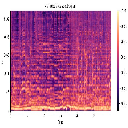

In [77]:
img = image.load_img(r'/content/output_dir/train/country/country_country.00007.jpg', target_size=(128, 128))

img

In [78]:

# Convert the input image 'img' to a NumPy array format. This is often required to feed an image into a neural network model.
x = image.img_to_array(img)
x=x/255

# Add an extra dimension to the array 'x'. This is typically done because the model expects a batch of images,
# even if we're only predicting one image. The 'axis=0' adds this batch dimension at the front.
x = np.expand_dims(x, axis=0)

# Pass the processed image 'x' into the model for prediction. The model returns a list of predictions,
# so we access the first (and usually only) element of the prediction output using '[0]'.
pred = model.predict(x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [79]:
pred

array([[0.6353491 , 0.02220052, 0.34245038]], dtype=float32)

In [80]:
pred.argmax()

np.int64(0)

In [50]:
train_generator.class_indices

{'blues': 0, 'classical': 1, 'country': 2, 'rock': 3}

In [ ]:
model

<Sequential name=sequential_1, built=True>